# *K*-Means Clustering

This technique is a reduction technique, such that the dimensions of the data set are reduced as clustering makes groups out of observations of data (rows).

Applications: vowel category classification ([Sandoval et al., 2013](https://asa.scitation.org/doi/10.1121/1.4826150)), language profiles ([Rysiewicz, 2008](https://onlinelibrary.wiley.com/doi/10.1111/j.1540-4781.2008.00688.x))

*K*-means clustering is an unsupervised machine learning technique, meaning that the data set is submitted to an algorithm that groups unlabeled rows of data. Unlabeled data means that there is no 'outcome' associated with the data set. An example of a labeled data set could be data obtained from a perceptual discrimination task, where each row of data is labeled as 'hit' or 'miss'. Unlabeled data could take the form of gradient measures of production, such as VOT. Some linguistic applications of *k*-means clustering includes classifying vowel production and grouping participants according to linguistic profiles.

An extremely useful Python package that will be used in this tutorial is `scikit-learn`. This package is often used in machine learning and statistical techniques.

Import the following libraries:

In [1]:
import pandas as pd # allows you to open .csv files into Python

# libraries for plotting
import matplotlib.pyplot as plt # allows you to plot in Python
# allows for plotting inline
%matplotlib inline

# k-means clustering
from sklearn.cluster import KMeans # KMeans algorithm
from sklearn.preprocessing import StandardScaler # z-scores data set, where mean = 0, SD = 1

### *K*-means Clustering

As mentioned earlier, *k*-means clustering is a simple method for sorting unlabeled data. The technique works with *k* number of centroids and assigns every data point in the data set to the nearest centroid. The centroids then shift to take the place of the new centroid of the generated cluster, then every data point is once again assigned to the cluster of the nearest centroid. The process is iterative and repeats until the sum of squared distances within clusters is minimized. 

![k-means animation](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif)

(Source: https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

#### Parameters of the *k*-means algorithm

Common parameters for the algorithm include:

- `init`; determines how the initial cluster centroids are chosen, `"k-means++"` is the default and chooses the centroids 'smartly', speeding up the process
- `n_clusters`; the number of cluster centroids, can be selected based on domain knowledge, or by best-fit methods (described below)
- `n_init`; the number of iterations to run through with different centroid starting points, default is 10

See <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html> for more details.

#### Determining the number of clusters

The number of clusters can either by determined by the researcher, based on domain knowledge, or can be decided via a variety of methods. Here, the "elbow method" (via a Scree Plot) will be shown used to select a value for `n_clusters`.

#### Practice
For this tutorial, the dataset `blp_scores.csv` can be used for practice. The data set contains raw responses to the [Bilingual Language Profile (BLP) survey](https://sites.la.utexas.edu/bilingual/) (Birdsong et al., 2012), with information from two separate languages about the following four categories:

- Attitudes towards the language
- History with the language
- Proficiency in the language
- Use of the language

We can use *k*-means clustering to group participants according to their similarity of responses. 

Import the dataset and then run the following code chunk to calculate the sum of squared distances produced by a range of *k*-values, 1-10:

In [2]:
# import .csv as dataframe
blp = pd.read_csv("data/blp_scores.csv")
blp.head()

,Participant,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,20,24,86,96,23,23,14,35
1,p2,20,24,87,97,18,24,1,44
2,p3,20,24,96,115,19,24,10,36
3,p4,12,12,81,120,19,24,17,33
4,p5,22,23,104,84,19,24,32,18


Next, we can normalize the values by dividing each column by the total possible points.

- Attitude - 24 points max
- History - 180 points
- Proficiency - 24 points max
- Use - 50 points max

In [3]:
blp['Attitude_Spanish'] = blp['Attitude_Spanish']/24
blp['Attitude_Catalan'] = blp['Attitude_Catalan']/24
blp['History_Spanish'] = blp['History_Spanish']/180
blp['History_Catalan'] = blp['History_Catalan']/180
blp['Proficiency_Spanish'] = blp['Proficiency_Spanish']/24
blp['Proficiency_Catalan'] = blp['Proficiency_Catalan']/24
blp['Use_Spanish'] = blp['Use_Spanish']/50
blp['Use_Catalan'] = blp['Use_Catalan']/50
blp.head()

,Participant,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,0.833333,1.000000,0.477778,0.533333,0.958333,0.958333,0.28,0.70
1,p2,0.833333,1.000000,0.483333,0.538889,0.750000,1.000000,0.02,0.88
2,p3,0.833333,1.000000,0.533333,0.638889,0.791667,1.000000,0.20,0.72
3,p4,0.500000,0.500000,0.450000,0.666667,0.791667,1.000000,0.34,0.66
4,p5,0.916667,0.958333,0.577778,0.466667,0.791667,1.000000,0.64,0.36


Even though the data is now on a common scale (0-1), the data still needs to be standardized with a z-score transform, where the mean is 0 and the variance is 1.

In [4]:
# drop the participant column from data set
blp_new = blp.drop('Participant', 1)

# perform the z-score transform
blp_std = StandardScaler().fit_transform(blp_new)

The best value of *k* can be determined with the elbow method, where the sum of squared distances is calculated for each value of *k* in a range from 1 to 10.

If the following line of code gives the error: "KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.", uncomment and run the next line before proceeding to re-run the code chunk with `KMeans()`.

In [6]:
#%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [7]:
# calculate sum of squared distances over range of k-values
Sum_of_squared_distances = []
K = range(1,10 + 1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(blp_std) 
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\atarv\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Next, plot the relationship between the *k*-value and its associated sum of squared distances. Because the sum of squared distance will be at the lowest when the *k*-value is equal to the number of points in the data set, the *k*-value should not be selected to minimize the sum of squared distance. However, the *k*-value on the Scree plot below at the "elbow" of the curve is the value that will minimize the sum of squared distance while still producing a meaningful clustering.

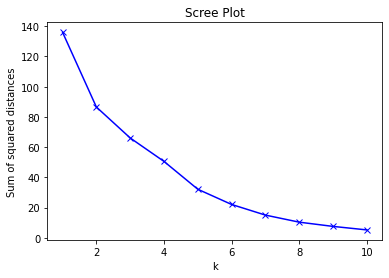

In [8]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Scree Plot')
plt.show()

From the plot above, the best value of k for this data set is 2. Now, this value can be plugged into the algorithm and the data can be clustered.

In [9]:
# set the parameters for the k-means algorithm
# n_init of 12 improves the accuracy a little
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)

# fit the algorithm to the dataframe
k_means.fit(blp_std)

# create an array called `k_means_labels` which contains the cluster label for each row in the dataframe
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

Now, the array of cluster labels can be attached to the original dataframe for future reference.

In [10]:
blp.insert(1, 'Cluster Labels', k_means_labels)
blp.head()

,Participant,Cluster Labels,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,0,0.833333,1.000000,0.477778,0.533333,0.958333,0.958333,0.28,0.70
1,p2,0,0.833333,1.000000,0.483333,0.538889,0.750000,1.000000,0.02,0.88
2,p3,0,0.833333,1.000000,0.533333,0.638889,0.791667,1.000000,0.20,0.72
3,p4,0,0.500000,0.500000,0.450000,0.666667,0.791667,1.000000,0.34,0.66
4,p5,1,0.916667,0.958333,0.577778,0.466667,0.791667,1.000000,0.64,0.36


Lastly, take the mean of each feature group for each cluster. This data, along with domain knowledge, will help to classify the clusters according to their distinguishing differences.

In [11]:
blp.groupby('Cluster Labels').mean()

,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
Cluster Labels,,,,,,,,
0,0.669872,0.958333,0.409829,0.571368,0.849359,0.964744,0.141538,0.830769
1,0.906250,0.875000,0.555556,0.422222,0.875000,0.927083,0.610000,0.225000


Based on the above results of clustering, a Spanish-dominant and a Catalan-dominant group emerge, where the groups differ across language attitudes, histories and use. 

For more examples of linguistic applications of *k*-means clustering, see [Rysiewicz (2008)](https://onlinelibrary.wiley.com/doi/10.1111/j.1540-4781.2008.00688.x) and [Sandoval et al. (2013)](https://asa.scitation.org/doi/10.1121/1.4826150).

---
### References
Birdsong, D., Gertken, L. M., & Amengual, M. (2012). Bilingual language profile: An easy-to-use instrument to assess bilingualism. *COERLL, University of Texas at Austin*.

Rysiewicz, J. (2008). Cognitive profiles of (un) successful FL learners: A cluster analytical study. *The Modern Language Journal*, 92(1), 87-99.

Sandoval, S., Berisha, V., Utianski, R. L., Liss, J. M., & Spanias, A. (2013). Automatic assessment of vowel space area. *The Journal of the Acoustical Society of America*, 134(5), EL477-EL483.

Sheehan, D. (2017). Clustering with SciKit with GIFs. https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/.